In [2]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving PLD_3_Classes_256_augmented_1_image_per_data.zip to PLD_3_Classes_256_augmented_1_image_per_data.zip


In [6]:
import zipfile
import io

# Replace 'your_uploaded_file.zip' with the actual file name
with zipfile.ZipFile(io.BytesIO(uploaded['PLD_3_Classes_256_augmented_1_image_per_data.zip']), 'r') as zip_ref:
    zip_ref.extractall('your_extracted_folder_one_aug')

In [1]:
import numpy as np
from PIL import Image
import random
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import os
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
dirctory = r'/content/your_extracted_folder/PLD_3_Classes_256/Training'
catagories = ['Early_Blight','Healthy','Late_Blight']
data_train = []
for category in catagories:
    folder = os.path.join(dirctory,category)
    label = catagories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        image_arr = np.array(Image.open(img_path))
        #print(image_arr.size)
        #plt.imshow(image_arr)
        #break
        data_train.append([image_arr,label])
print(len(data_train))

3251


In [3]:
dirctory = r'/content/your_extracted_folder/PLD_3_Classes_256//Testing'
catagories = ['Early_Blight','Healthy','Late_Blight']
data_test = []
for category in catagories:
    folder = os.path.join(dirctory,category)
    label = catagories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        image_arr = np.array(Image.open(img_path))
        #print(image_arr.size)
        #plt.imshow(image_arr)
        #break
        data_test.append([image_arr,label])
print(len(data_test))

405


In [4]:
dirctory = r'/content/your_extracted_folder/PLD_3_Classes_256//Validation'
catagories = ['Early_Blight','Healthy','Late_Blight']
data_valid = []
for category in catagories:
    folder = os.path.join(dirctory,category)
    label = catagories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        image_arr = np.array(Image.open(img_path))
        #print(image_arr.size)
        #plt.imshow(image_arr)
        #break
        data_valid.append([image_arr,label])
print(len(data_valid))

416


In [5]:
random.shuffle(data_train)
random.shuffle(data_test)
random.shuffle(data_valid)

In [6]:
x_train = []
y_train = []
for feature,labels in data_train:
    x_train.append(feature)
    y_train.append(labels)
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape,y_train.shape)

(3251, 256, 256, 3) (3251,)


In [7]:
x_test = []
y_test = []
for feature,labels in data_test:
    x_test.append(feature)
    y_test.append(labels)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape,y_test.shape)

(405, 256, 256, 3) (405,)


In [8]:
x_valid = []
y_valid = []
for feature,labels in data_valid:
    x_valid.append(feature)
    y_valid.append(labels)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
print(x_valid.shape,y_valid.shape)

(416, 256, 256, 3) (416,)


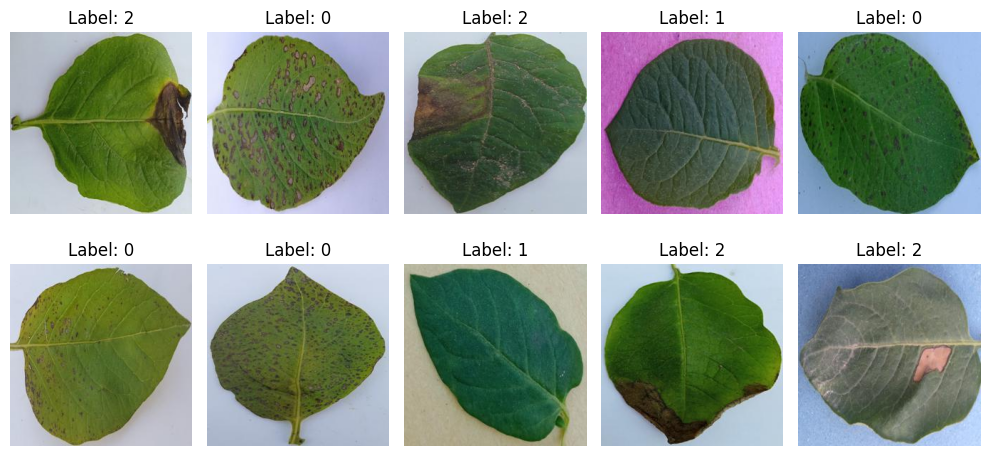

In [9]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i].reshape(256, 256,3), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the labels to a 2D array
y_train = y_train.reshape(-1, 1)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels
y_train_encoded = encoder.fit_transform(y_train)

In [11]:
# Reshape the labels to a 2D array
y_test = y_test.reshape(-1, 1)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels
y_test_encoded = encoder.fit_transform(y_test)

In [12]:
# Reshape the labels to a 2D array
y_valid = y_valid.reshape(-1, 1)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels
y_valid_encoded = encoder.fit_transform(y_valid)

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Resize images to 224x224 (VGG16 input size)
resize_target = (224, 224)
x_train_resized = tf.image.resize(x_train, resize_target)
x_test_resized = tf.image.resize(x_test, resize_target)

# Preprocess images for VGG16
x_train_preprocessed = preprocess_input(x_train_resized)
x_test_preprocessed = preprocess_input(x_test_resized)


# Load pre-trained MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using VGG16
x_train_features = mobilenet_model.predict(x_train_preprocessed)
x_test_features = mobilenet_model.predict(x_test_preprocessed)

13/13 [==============================] - 1s 103ms/step


In [14]:
# Flatten features
x_train_flat = x_train_features.reshape(x_train_features.shape[0], -1)
x_test_flat = x_test_features.reshape(x_test_features.shape[0], -1)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train_flat = x_train_features.reshape(x_train_preprocessed.shape[0], -1)
x_test_flat = x_test_features.reshape(x_test_preprocessed.shape[0], -1)
#x_valid_flat = x_valid.reshape(x_valid_preprocessed.shape[0], -1)

# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train_flat, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Number of features
num_features = x_train_flat.shape[1]

# Hyperparameters
num_ants = 10
num_iterations = 5
max_iter_without_improvement = 4
pheromone_matrix = np.ones(num_features)  # Initialize pheromone matrix

# Function to evaluate the Decision Tree classifier
def evaluate_decision_tree(features):
    selected_features = features.astype(bool)
    x_train_selected = x_train_flat[:, selected_features]
    x_test_selected = x_test_flat[:, selected_features]

    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(x_train_selected, y_train)

    y_pred = decision_tree.predict(x_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Ant Colony Optimization
best_accuracy = 0
best_solution = None
iter_without_improvement = 0

for iteration in range(num_iterations):
    ant_solutions = []

    # Construct ant solutions
    for ant in range(num_ants):
        probabilities = pheromone_matrix / np.sum(pheromone_matrix)
        selected_features = np.random.choice(num_features, size=num_features, p=probabilities)
        accuracy = evaluate_decision_tree(selected_features)
        ant_solutions.append((selected_features, accuracy))

        # Update best solution
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_solution = selected_features
            iter_without_improvement = 0
        else:
            iter_without_improvement += 1





    # Check for convergence
    if iter_without_improvement >= max_iter_without_improvement:
        print(f"Converged at iteration {iteration}")
        break

# Print the results
print(f"Best Features Selected: {best_solution}")
print(f"Decision Tree Accuracy with Best Features: {best_accuracy}")


Converged at iteration 1
Best Features Selected: [32402 12462 47942 ... 33452   171 56446]
Decision Tree Accuracy with Best Features: 0.7555555555555555


In [21]:
print(len(best_solution))

62720


In [23]:
# Predict on test set
y_pred_test = decision_tree.predict(x_test_flat)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.745679012345679


In [24]:
#y_pred = decision_tree.predict(x_train)

print("Integer label:", set(y_pred_test))

Integer label: {0, 1, 2}


              precision    recall  f1-score   support

           0       0.83      0.78      0.81       162
           1       0.66      0.72      0.69       102
           2       0.72      0.73      0.72       141

    accuracy                           0.75       405
   macro avg       0.74      0.74      0.74       405
weighted avg       0.75      0.75      0.75       405



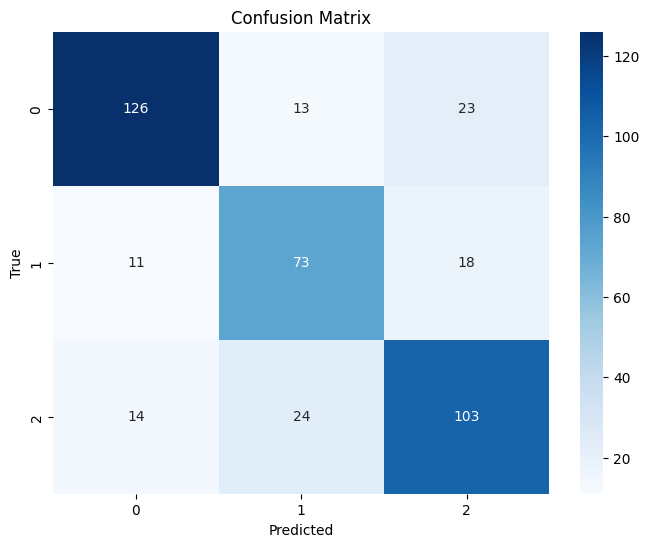

In [27]:
# Generate the classification report
report = classification_report(y_test, y_pred_test)

# Print the classification report
print(report)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_pred_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()